In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import distributions
from classes.variables import Normal, Gamma
from classes.sampler import mh_step, joint_normal
# from classes.dpm import DPM

In [2]:
y = distributions.norm.rvs(loc=-1, scale=1, size=20)

In [3]:
np.mean(y), np.std(y)

(-1.1761858577554618, 0.9945591763546159)

In [8]:
mu = Normal()
sigma = Gamma()

thetas = [mu, sigma]

t_ = []
a_ = []

n_iter = 2000
burn_in = 100
lag = 5
for i in range(n_iter):
    thetas, accept = mh_step(y, thetas, likelihood=joint_normal, step_size=.25)
    if i > burn_in and i % lag == 0:
        t_.append([theta.current for theta in thetas])
        a_.append(accept)

t_ = np.array(t_)
print(np.sum(a_) / len(a_))
    

0.45910290237467016


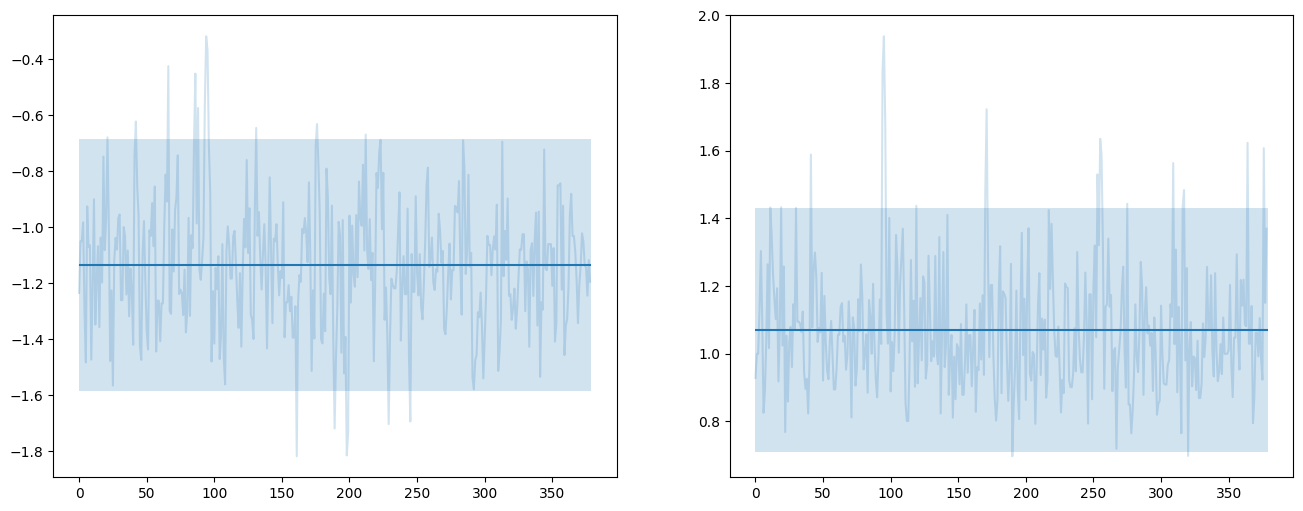

In [9]:
n_parameters = t_.shape[1]
fig, ax = plt.subplots(nrows=1, ncols=n_parameters, figsize=(n_parameters*8, 6))

for i in range(n_parameters):
    theta_chain = t_[:,i]
    ax[i].plot(theta_chain, alpha=0.2)
    ax[i].hlines([np.mean(theta_chain)], xmin=0, xmax=len(theta_chain))
    ax[i].fill_between(x=[0, len(theta_chain)], y1=np.mean(theta_chain) + 1.96*np.std(theta_chain), y2=np.mean(theta_chain) - 1.96*np.std(theta_chain), alpha=0.2)
    # ax[i].hlines([np.mean(y)], xmin=0, xmax=len(theta_chain), color="red", linestyles="dashed")
